In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
rc = pd.read_csv ('H:/FFIEC CDR Call Schedule RC 03312024.txt', sep = '\t')
rca = pd.read_csv ('H:/FFIEC CDR Call Schedule RCA 03312024.txt', sep = '\t')
rc.head()

,IDRSSD,RCFD0071,RCFD0081,RCFD1773,RCFD2130,RCFD2143,RCFD2145,RCFD2150,RCFD2160,RCFD2170,...,RCONB529,RCONB530,RCONB987,RCONB989,RCONB993,RCONB995,RCONG105,RCONJA22,RCONJJ34,Unnamed: 80
0,NaN,INT-BEARING BALS DUE FRM DEP INSTS,NONINTEREST-BEARING BALS&CURR&COIN,AVAILABLE-FOR-SALE SECURITIES,INVEST. IN UNCONSOLIDATED SUBS & CO.,INTANGIBLE ASSETS,PREMISES&FIXED ASSETS(INCL ROU),OTHER REAL ESTATE OWNED,OTHER ASSETS,TOTAL ASSETS,...,"LOANS & LEASES, NET UNEARN INC&ALLOW",ACCUMULATED OTH COMPREHENSIVE INCOME,FEDERAL FNDS SOLD,SECURS PURCHSD UDR AGRMNTS TO RESELL,FEDERAL FNDS PURCD IN DOMESTIC OFFCS,SECURS SOLD UNDR AGRMNTS TO REPURCH,TOT EQT CAP INC NONCTRL MINORITY INT,Equity securities with readily deter,Held to maturity securities (ASU 201,NaN
1,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20801,-5301,0,0,0,0,11866,0,0,NaN
2,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29984,-2064,2792,0,0,0,3639,0,0,NaN
3,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,252805,-5175,15107,0,0,0,40752,0,24776,NaN
4,354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57087,-16,7550,0,0,0,6783,0,0,NaN


In [38]:
deposits = rc[['IDRSSD', 'RCON2200']]
deposits.head()

,IDRSSD,RCON2200
0,NaN,TOTAL DEPOSITS
1,37.0,65927
2,242.0,49445
3,279.0,341651
4,354.0,62897


In [39]:
reserves = rca[['IDRSSD', 'RCON0090']]


In [40]:
banks = pd.merge (deposits, reserves, on = 'IDRSSD', how = 'inner')
banks = banks.drop(index=0)
banks

,IDRSSD,RCON2200,RCON0090
1,37.0,65927,NaN
2,242.0,49445,NaN
3,279.0,341651,NaN
4,354.0,62897,NaN
5,457.0,65479,NaN
...,...,...,...
4619,5805817.0,0,NaN
4620,5807400.0,1650,NaN
4621,5859511.0,0,NaN
4622,5860740.0,12121,NaN


In [41]:
banks['RCON2200'] = banks['RCON2200'].apply(lambda x: math.log(float(x)+1))
banks['RCON0090'] = banks['RCON0090'].apply(lambda x: math.log(float(x)+1))
banks['ratio'] = banks['RCON0090'] / banks['RCON2200']
banks = banks[banks['ratio'] > 0]

<Axes: xlabel='ratio', ylabel='Count'>

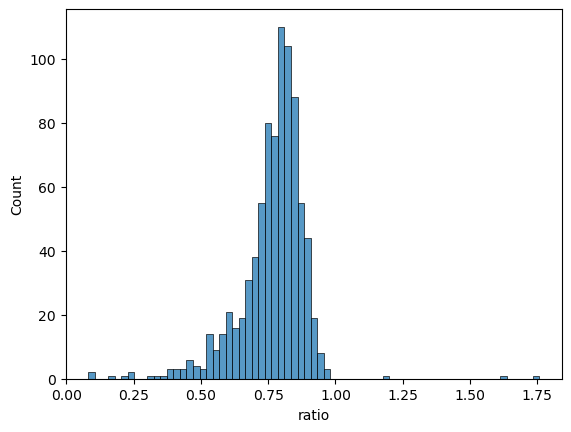

In [42]:
sns.histplot (data=banks, x = 'ratio')